Načtení balíčků

In [23]:
from google.cloud import vision
from google.oauth2 import service_account

In [24]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io

Připojení Google API

In [25]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [26]:
client = vision.ImageAnnotatorClient(credentials=creds)

In [27]:
with io.open(soubor, 'rb') as image_file:
    content = image_file.read()

In [28]:
image = vision.Image(content = content)

In [29]:
response = client.label_detection(image = image)

In [30]:
labels = response.label_annotations

Hromadné načtení obrázků

In [31]:
import os

In [32]:
path = './data_obraz/tym14'

Získání labelů

In [33]:
def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    return labels

In [34]:
labels_images = {}

In [35]:
directories = os.listdir(path)

In [36]:
for i in directories:
    lbls = get_labels(os.path.join(path, i))
    lbl_set = [i.description for i in lbls]
    labels_images[os.path.join(path, i)] = lbl_set

Vypsání labelů

In [37]:
print(labels_images)

{'./data_obraz/tym14\\100002.jpg': ['Vegetation', 'Nature', 'Mountainous landforms', 'Natural environment', 'Highland', 'Hill', 'Natural landscape', 'Plant community', 'Mountain range', 'Mountain'], './data_obraz/tym14\\100301.jpg': ['Vegetation', 'Nature', 'Natural landscape', 'Landscape', 'Plant community', 'Highland', 'Plantation', 'Terrace', 'Rural area', 'Nature reserve'], './data_obraz/tym14\\100503.jpg': ['Vegetation', 'Mountainous landforms', 'Highland', 'Plant community', 'Hill', 'Mountain', 'Nature reserve', 'Atmospheric phenomenon', 'Hill station', 'Forest'], './data_obraz/tym14\\126901.jpg': ['Bank', 'Shore', 'Rock', 'Residential area', 'Evening', 'Watercourse', 'Channel', 'Dusk', 'Coast', 'Rubble'], './data_obraz/tym14\\131603.jpg': ['Rock', 'Bedrock', 'Coastal and oceanic landforms', 'Outcrop', 'Geology', 'Formation', 'Geological phenomenon', 'Fault', 'Coast', 'Badlands'], './data_obraz/tym14\\134200.jpg': ['Sky', 'Coastal and oceanic landforms', 'Shore', 'Cloud', 'Coast'

In [38]:
tags = {}
for k, v in labels_images.items():
    for j in v:
        pocet = tags.get(j, [0, []])[0] + 1
        seznam = tags.get(j, [0, []])[1]
        seznam.append(k)
        tags[j] = [pocet, seznam]

Četnosti výskytu daných tagů

In [39]:
print(tags)

{'Vegetation': [4, ['./data_obraz/tym14\\100002.jpg', './data_obraz/tym14\\100301.jpg', './data_obraz/tym14\\100503.jpg', './data_obraz/tym14\\144802.jpg']], 'Nature': [3, ['./data_obraz/tym14\\100002.jpg', './data_obraz/tym14\\100301.jpg', './data_obraz/tym14\\147200.jpg']], 'Mountainous landforms': [2, ['./data_obraz/tym14\\100002.jpg', './data_obraz/tym14\\100503.jpg']], 'Natural environment': [1, ['./data_obraz/tym14\\100002.jpg']], 'Highland': [4, ['./data_obraz/tym14\\100002.jpg', './data_obraz/tym14\\100301.jpg', './data_obraz/tym14\\100503.jpg', './data_obraz/tym14\\148501.jpg']], 'Hill': [2, ['./data_obraz/tym14\\100002.jpg', './data_obraz/tym14\\100503.jpg']], 'Natural landscape': [3, ['./data_obraz/tym14\\100002.jpg', './data_obraz/tym14\\100301.jpg', './data_obraz/tym14\\147200.jpg']], 'Plant community': [5, ['./data_obraz/tym14\\100002.jpg', './data_obraz/tym14\\100301.jpg', './data_obraz/tym14\\100503.jpg', './data_obraz/tym14\\144802.jpg', './data_obraz/tym14\\147200.jpg

In [40]:
sort_tabs = sorted(tags.items(), key = lambda x: x[1], reverse = True)

In [41]:
print(sort_tabs)

[('Plant community', [5, ['./data_obraz/tym14\\100002.jpg', './data_obraz/tym14\\100301.jpg', './data_obraz/tym14\\100503.jpg', './data_obraz/tym14\\144802.jpg', './data_obraz/tym14\\147200.jpg']]), ('Rural area', [4, ['./data_obraz/tym14\\100301.jpg', './data_obraz/tym14\\144703.jpg', './data_obraz/tym14\\147000.jpg', './data_obraz/tym14\\148501.jpg']]), ('Highland', [4, ['./data_obraz/tym14\\100002.jpg', './data_obraz/tym14\\100301.jpg', './data_obraz/tym14\\100503.jpg', './data_obraz/tym14\\148501.jpg']]), ('Vegetation', [4, ['./data_obraz/tym14\\100002.jpg', './data_obraz/tym14\\100301.jpg', './data_obraz/tym14\\100503.jpg', './data_obraz/tym14\\144802.jpg']]), ('Land lot', [3, ['./data_obraz/tym14\\144802.jpg', './data_obraz/tym14\\147000.jpg', './data_obraz/tym14\\148501.jpg']]), ('Village', [3, ['./data_obraz/tym14\\144703.jpg', './data_obraz/tym14\\147000.jpg', './data_obraz/tym14\\148501.jpg']]), ('Cloud', [3, ['./data_obraz/tym14\\134200.jpg', './data_obraz/tym14\\147200.jpg'

In [42]:
print(sort_tabs[0])

('Plant community', [5, ['./data_obraz/tym14\\100002.jpg', './data_obraz/tym14\\100301.jpg', './data_obraz/tym14\\100503.jpg', './data_obraz/tym14\\144802.jpg', './data_obraz/tym14\\147200.jpg']])


Zobrazení obrázků s popisky

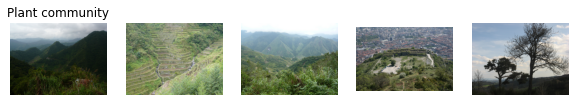

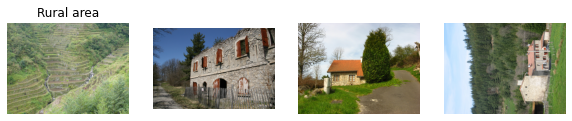

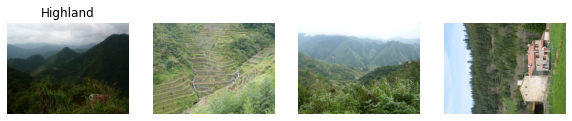

In [43]:
for k in range(3):
    pocet = sort_tabs[k][1][0]
    f, ax = plt.subplots(1, pocet, figsize = (10, 10))
    ax[0].set_title(sort_tabs[k][0])

    for i in range(pocet):
        ax[i].imshow(imread(sort_tabs[k][1][1][i]))
        ax[i].axis('off')

    plt.show()